# Model Selection & Cross Validation
---
Here is a detailed explanation of what steps we can follow to select model for a particular problem statement. This involves using cross validation techniques.



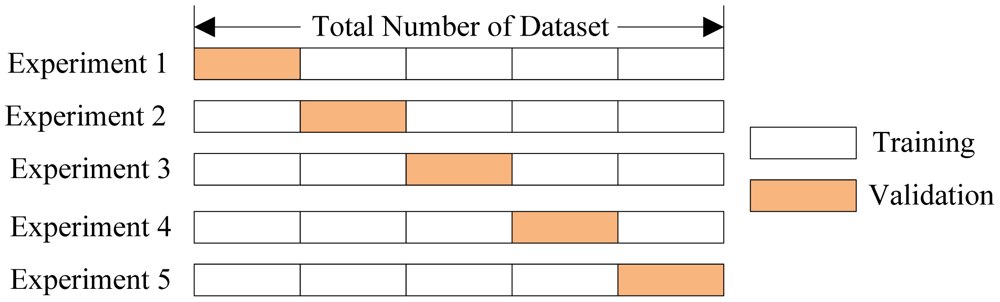

> ## Cross Validation
`Cross Validation` is a technique which involves reserving a particular sample of a data set on which you do not train the model. Later, you test the model on this sample before finalizing the model.

Here are the steps involved in Cross Validation:
- You reserve a sample data set
- Train the model using the remaining part of the data set
- Use the reserve sample of the data set as test (validation) set. This will help you to know the effectiveness of the model performance. If your model delivers a positive result on validation data, go ahead with current model. 

> ## Import Required Libraries

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

> ## Import the Dataset

In [5]:
df = pd.read_excel('./purchase_data.xlsx')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


> ## Extract Independent and Dependent Features

In [6]:
X = df[['Age', 'EstimatedSalary']]
y = df['Purchased']

> ## Split the data into Train and Test sets

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)

> ## Fit `KNeighborsClassifier` model on the train data

In [9]:
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train, y_train)
y_pred = knn_clf.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.77

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=3)
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train, y_train)
y_pred = knn_clf.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.81

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train, y_train)
y_pred = knn_clf.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.74

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2)
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train, y_train)
y_pred = knn_clf.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.78

## Implementing Cross Validation
> ## K-Nearest Neighbors

In [16]:
from sklearn.model_selection import cross_val_score

knn_clf = KNeighborsClassifier(n_neighbors=5)
print(cross_val_score(knn_clf, X, y, cv=10, scoring='accuracy'))
print(cross_val_score(knn_clf, X, y, cv=10, scoring='accuracy').mean())

[0.7   0.925 0.85  0.875 0.775 0.675 0.75  0.8   0.725 0.775]
0.7849999999999999


> ## Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
print(cross_val_score(log_reg, X, y, cv=10, scoring='accuracy'))
print(cross_val_score(log_reg, X, y, cv=10, scoring='accuracy').mean())

[0.65  0.65  0.65  0.65  0.65  0.65  0.65  0.625 0.625 0.625]
0.6425000000000001
